In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import gmaps.datasets
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import g_key

In [9]:
# Read .csv file of final school data
school_file = os.path.join ("./Resources/school_grades_final.csv")
school_grades = pd.read_csv(school_file)

home_file = os.path.join ("../GB/Resources/All_Hill_Prop_Value.csv")
home_values = pd.read_csv(home_file)

In [2]:
# Configure gmaps
# gmaps.configure(api_key = g_key)
# url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?""
# query = url + 

In [10]:
school_grades.head()

,Unnamed: 0,District Number,District Name,School Number,School Name,Total Points Earned,Total Components,Percent of Total Possible Points,Percent Tested,Grade 2019,...,Grade 2017,Grade 2016,Informational Baseline Grade 2015,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,ZIP
0,1420,29,HILLSBOROUGH,42,FOREST HILLS ELEMENTARY SCHOOL,338,7,48,100,C,...,D,F,F,NO,YES,N,1,85.6,94.6,33612
1,1422,29,HILLSBOROUGH,51,SHEEHY ELEMENTARY SCHOOL,351,7,50,100,C,...,D,D,F,NO,YES,N,1,97.4,98.0,33610
2,1424,29,HILLSBOROUGH,54,CORR ELEMENTARY SCHOOL,315,7,45,100,C,...,C,C,D,NO,YES,N,1,79.1,78.0,33534
3,1426,29,HILLSBOROUGH,56,DAVIS ELEMENTARY SCHOOL,333,7,48,100,C,...,C,C,C,NO,YES,N,1,85.8,90.5,33615
4,1427,29,HILLSBOROUGH,59,FISHHAWK CREEK ELEMENTARY SCHOOL,497,7,71,100,A,...,A,A,A,NO,NO,N,1,30.6,13.8,33547


In [22]:
# Add column for average property value in school dataframe
school_grades['Avg Prop Value']= ""
school_grades

,Unnamed: 0,District Number,District Name,School Number,School Name,Total Points Earned,Total Components,Percent of Total Possible Points,Percent Tested,Grade 2019,...,Grade 2016,Informational Baseline Grade 2015,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,ZIP,Avg Prop Value
0,1420,29,HILLSBOROUGH,42,FOREST HILLS ELEMENTARY SCHOOL,338,7,48,100,C,...,F,F,NO,YES,N,1,85.6,94.6,33612,
1,1422,29,HILLSBOROUGH,51,SHEEHY ELEMENTARY SCHOOL,351,7,50,100,C,...,D,F,NO,YES,N,1,97.4,98.0,33610,
2,1424,29,HILLSBOROUGH,54,CORR ELEMENTARY SCHOOL,315,7,45,100,C,...,C,D,NO,YES,N,1,79.1,78.0,33534,
3,1426,29,HILLSBOROUGH,56,DAVIS ELEMENTARY SCHOOL,333,7,48,100,C,...,C,C,NO,YES,N,1,85.8,90.5,33615,
4,1427,29,HILLSBOROUGH,59,FISHHAWK CREEK ELEMENTARY SCHOOL,497,7,71,100,A,...,A,A,NO,NO,N,1,30.6,13.8,33547,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1627,29,HILLSBOROUGH,4801,WILSON ELEMENTARY SCHOOL,284,7,41,99,C,...,C,C,NO,YES,N,1,72.2,90.5,33563,
129,1628,29,HILLSBOROUGH,4841,WIMAUMA ELEMENTARY SCHOOL,332,7,47,99,C,...,C,C,NO,YES,N,1,92.1,95.4,33598,
130,1629,29,HILLSBOROUGH,4921,WITTER ELEMENTARY SCHOOL,259,7,37,99,D,...,C,D,NO,YES,N,1,95.9,96.1,33612,
131,1630,29,HILLSBOROUGH,4941,WOODBRIDGE ELEMENTARY SCHOOL,315,7,45,100,C,...,B,C,NO,YES,N,1,90.1,89.7,33615,


In [76]:
# View dataframe with home value data
home_values

,Unnamed: 0,SEQ_NO,PARCEL_ID,PropertyValue,NBRHD_CD,CENSUS_BK,PropAddress,City,ZipCode
0,0,1,153323ZZZ000000000200A,4628604,22700200,120579900000,EGMONT KEY,ST PETERSBURG,33715
1,3,4,172701001000000000001U,147699,21100700,120570115091,19507 PINE TREE RD,ODESSA,33556
2,4,5,172701001000000000010U,140829,21100700,120570115092,19931 ANGEL LN,ODESSA,33556
3,5,6,172701001000000000011U,462229,21100700,120570115092,19859 ANGEL LN,ODESSA,33556
4,6,7,172701001000000000012U,496434,21100700,120570115091,7320 W COUNTY LINE RD,ODESSA,33556
...,...,...,...,...,...,...,...,...,...
487178,501068,504373,223233ZZZ000005341400U,2283420,22900400,120570139032,21694 TAYLOR GILL RD,LITHIA,33547
487179,501069,504374,223233ZZZ000005341500U,212500,22900400,120570139032,1,LITHIA,33547
487180,501070,504375,223233ZZZ000005341600U,291900,22900400,120570139032,1,LITHIA,33547
487181,501071,504376,223234ZZZ000005341800U,4261405,42900100,120570139032,11200 S 37 RD,LITHIA,33547


In [80]:
# Calculate the IQR 
q3 = home_values["PropertyValue"].quantile(q=.75)
q1 = home_values["PropertyValue"].quantile(q=.25)
iqr = q3 - q1

print(f"The lower quartile of property value is: {q1}")
print(f"The upper quartile of property value is: {q3}")
print(f"The interquartile range of property value is: {iqr}")

# Use the Interquartile Rule to find outliers
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

print(f"Upper bound is {upper_bound}")
print(f"Lower bound is {lower_bound}")

index_outlier = home_values[(home_values['PropertyValue'] < lower_bound) | (home_values['PropertyValue'] > upper_bound)].index

home_values_clean = home_values.drop(index_outlier, inplace = False)
home_values_clean

The lower quartile of property value is: 112820.5
The upper quartile of property value is: 233670.5
The interquartile range of property value is: 120850.0
Upper bound is 414945.5
Lower bound is -68454.5


,Unnamed: 0,SEQ_NO,PARCEL_ID,PropertyValue,NBRHD_CD,CENSUS_BK,PropAddress,City,ZipCode
1,3,4,172701001000000000001U,147699,21100700,120570115091,19507 PINE TREE RD,ODESSA,33556
2,4,5,172701001000000000010U,140829,21100700,120570115092,19931 ANGEL LN,ODESSA,33556
5,7,8,172701001000000000013U,358083,21100700,120570115091,7212 W COUNTY LINE RD,ODESSA,33556
7,9,10,172701001000000000015U,325923,21100700,120570115091,7326 W COUNTY LINE RD,ODESSA,33556
8,10,11,172701001000000000016U,377100,21100700,120570115091,7308 W COUNTY LINE RD,ODESSA,33556
...,...,...,...,...,...,...,...,...,...
487167,501057,504362,223228ZZZ000005339700U,339810,22900400,120570139032,14707 TAYLOR RD,LITHIA,33547
487168,501058,504363,223228ZZZ000005339800U,164622,22900400,120570139032,1,LITHIA,33547
487171,501061,504366,223228ZZZ000005340200U,291900,22900400,120570139032,1,LITHIA,33547
487179,501069,504374,223233ZZZ000005341500U,212500,22900400,120570139032,1,LITHIA,33547


In [82]:
home_average = home_values_clean.groupby(['ZipCode'])

home_average_df = pd.DataFrame(home_average["PropertyValue"].mean())
home_average_df = home_average_df.reset_index()

home_average_df.head()

,ZipCode,PropertyValue
0,33503,381777.000000
1,33510,164996.056665
2,33511,180638.048585
3,33527,173978.659792
4,33534,146241.047344


In [83]:
# Add average property value to school dataframe
for i, row in home_average_df.iterrows():
    school_grades.loc[school_grades['ZIP'] == row['ZipCode'], "Avg Prop Value"] = row['PropertyValue']

school_grades.astype({'Avg Prop Value': 'float64'}).dtypes
school_grades

,Unnamed: 0,District Number,District Name,School Number,School Name,Total Points Earned,Total Components,Percent of Total Possible Points,Percent Tested,Grade 2019,...,Grade 2016,Informational Baseline Grade 2015,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,ZIP,Avg Prop Value
0,1420,29,HILLSBOROUGH,42,FOREST HILLS ELEMENTARY SCHOOL,338,7,48,100,C,...,F,F,NO,YES,N,1,85.6,94.6,33612,124199
1,1422,29,HILLSBOROUGH,51,SHEEHY ELEMENTARY SCHOOL,351,7,50,100,C,...,D,F,NO,YES,N,1,97.4,98.0,33610,108862
2,1424,29,HILLSBOROUGH,54,CORR ELEMENTARY SCHOOL,315,7,45,100,C,...,C,D,NO,YES,N,1,79.1,78.0,33534,146241
3,1426,29,HILLSBOROUGH,56,DAVIS ELEMENTARY SCHOOL,333,7,48,100,C,...,C,C,NO,YES,N,1,85.8,90.5,33615,167989
4,1427,29,HILLSBOROUGH,59,FISHHAWK CREEK ELEMENTARY SCHOOL,497,7,71,100,A,...,A,A,NO,NO,N,1,30.6,13.8,33547,213716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1627,29,HILLSBOROUGH,4801,WILSON ELEMENTARY SCHOOL,284,7,41,99,C,...,C,C,NO,YES,N,1,72.2,90.5,33563,125743
129,1628,29,HILLSBOROUGH,4841,WIMAUMA ELEMENTARY SCHOOL,332,7,47,99,C,...,C,C,NO,YES,N,1,92.1,95.4,33598,162025
130,1629,29,HILLSBOROUGH,4921,WITTER ELEMENTARY SCHOOL,259,7,37,99,D,...,C,D,NO,YES,N,1,95.9,96.1,33612,124199
131,1630,29,HILLSBOROUGH,4941,WOODBRIDGE ELEMENTARY SCHOOL,315,7,45,100,C,...,B,C,NO,YES,N,1,90.1,89.7,33615,167989


In [92]:
# Create dataframe of only 2019 school grades
grade_w_value_19 = school_grades.loc[:,["School Number", "School Name", "Percent of Total Possible Points", "Grade 2019", "ZIP", "Avg Prop Value"]]

# Sort values for plot
grade_w_value_19 = grade_w_value_19.sort_values("Grade 2019", ascending=False)
grade_w_value_19

,School Number,School Name,Percent of Total Possible Points,Grade 2019,ZIP,Avg Prop Value
56,1481,FOSTER ELEMENTARY SCHOOL,30,F,33610,108862
127,4747,JAMES ELEMENTARY SCHOOL,22,F,33610,108862
93,3201,OAK PARK ELEMENTARY SCHOOL,27,F,33605,95274.1
16,120,KIMBELL ELEMENTARY SCHOOL,31,F,33617,144510
48,1081,DESOTO ELEMENTARY SCHOOL,36,D,33605,95274.1
...,...,...,...,...,...,...
26,361,BEVIS ELEMENTARY SCHOOL,79,A,33547,213716
24,271,ALAFIA ELEMENTARY SCHOOL,68,A,33596,225921
21,161,BALLAST POINT ELEMENTARY SCHOOL,65,A,33611,192131
105,3861,SCHWARZKOPF ELEMENTARY SCHOOL,73,A,33558,247496


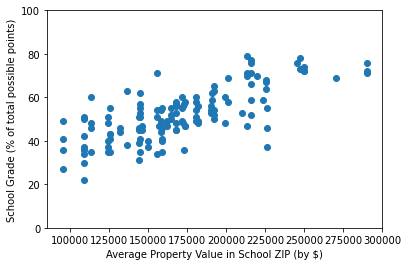

In [95]:
#Create scatter plot 

# Set x and y values for scatter plot
x_values = grade_w_value_19['Avg Prop Value']
y_values = grade_w_value_19['Percent of Total Possible Points']

# Perform a linear regression on latitude vs. max temp
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
# regress_values = x_values * slope + intercept

# Create line equation string
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values, y_values)
# plt.plot(x_values,regress_values,"r-")
plt.xlabel('Average Property Value in School ZIP (by $)')
plt.ylabel("School Grade (% of total possible points)")
plt.ylim(0, 100)
# plt.annot(line_eq,(5,-40),fontsize=15,color="red")

# Print r value
# print(f"The r- is: {rvalue**2}")

# Display plot
plt.show()